In [1]:
from pytrends.request import TrendReq

#create a pytrends object. request data from Google Trends
pytrends = TrendReq(hl='en-US')

#extract data about keywords
keywords = ['German Shepherd', 'French Bulldog', 'Chihuahua', 'Pit Bull', 'Dachshund']
pytrends.build_payload(keywords, timeframe='today 5-y')

#specify and get data
data = pytrends.interest_over_time()
data

,German Shepherd,French Bulldog,Chihuahua,Pit Bull,Dachshund,isPartial
date,,,,,,
2018-01-21,33,21,78,10,15,False
2018-01-28,34,20,82,10,15,False
2018-02-04,30,21,77,9,14,False
2018-02-11,35,20,78,10,15,False
2018-02-18,31,21,75,10,15,False
...,...,...,...,...,...,...
2022-12-11,21,13,77,8,15,False
2022-12-18,22,14,74,8,16,False
2022-12-25,25,15,87,9,18,False


In [2]:
type(data)

pandas.core.frame.DataFrame

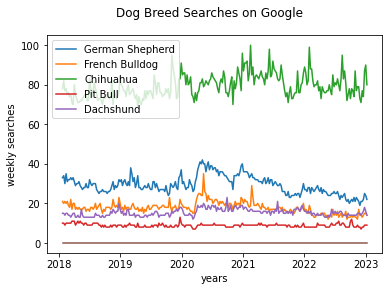

In [3]:
#plot data
import matplotlib.pyplot as plt

plt.plot(data)

#add titles
plt.suptitle('Dog Breed Searches on Google')
plt.xlabel('years')
plt.ylabel('weekly searches')

#add legend
plt.legend(keywords, loc='upper left')
plt.savefig('data.png')

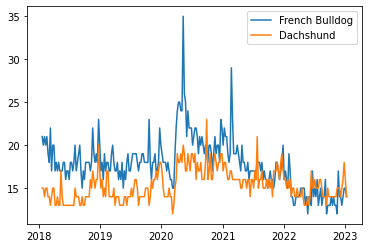

In [4]:
#analyze data
focus = ['French Bulldog', 'Dachshund']

plt.plot(data[focus])
plt.legend(focus)

In [14]:
#extract country-level data about the keywords
data2 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get countries with the most searches of 'Python' over the years
data2 = data2['French Bulldog'].nlargest(10)
data2

geoName
Bermuda           100
Turkey             55
Guernsey           37
Cyprus             34
Thailand           33
Aruba              32
Jersey             32
Malta              32
Iceland            31
United Kingdom     30
Name: French Bulldog, dtype: int32

In [15]:
type(data2)

pandas.core.series.Series

In [16]:
#convert to Dataframe
data2 = data2.to_frame()
data2

,French Bulldog
geoName,
Bermuda,100
Turkey,55
Guernsey,37
Cyprus,34
Thailand,33
Aruba,32
Jersey,32
Malta,32
Iceland,31


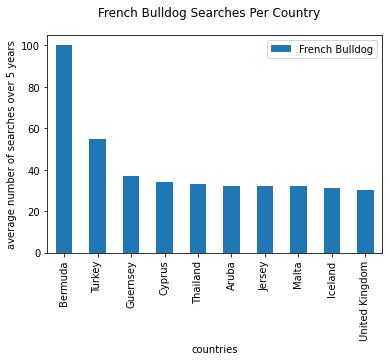

In [17]:
#plot bar chart WITH PANDAS
data2.plot(kind='bar')

#add titles
plt.suptitle('French Bulldog Searches Per Country')
plt.xlabel('countries')
plt.ylabel('average number of searches over 5 years')

plt.show()

In [18]:
#plot a bar chart with multiple keywords
data3 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)
data3 = data3[55:60]
data3

,German Shepherd,French Bulldog,Chihuahua,Pit Bull,Dachshund
geoName,,,,,
Cuba,1,0,93,4,2
Curaçao,0,0,100,0,0
Cyprus,30,34,24,5,7
Czechia,22,21,32,8,17
Côte d’Ivoire,0,0,75,25,0


<AxesSubplot: xlabel='geoName'>

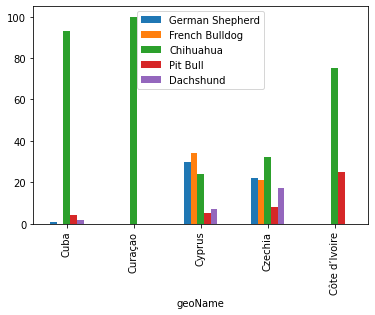

In [19]:
data3.plot(kind='bar')